# Simulation 4: Batch Size Sweep

TJ Kim
8/8/20

Find performance based on batch size:
- 15 users, 8 servers, 16 ts
- Jobs last entire duration
- Resources, limited

Batch sizes to sweep:
- 1,2,4,6,8,12,16

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim4")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim4_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *

### Run Simulations

First set batch settings and num trials.

In [2]:
batch_settings = [1,2,4,6,8,12,16]
batch_cost_stores = {}
for val in batch_settings:
    batch_cost_stores[val] = []

In [3]:
num_trials = 5

for i in range(num_trials):
    print("Trial Number:",i)
    
    # Make Users shared amongst all batch values
    users, servers, links, jobs, sim_param = simulation_setting()
    
    for val in batch_settings:
        print("batch val:",val)

        refresh_rate = [val,0]
        refresh = True

        for j in range(len(jobs)):
            jobs[j].info_from_usr(users[j],refresh_rate,refresh)

        # Make Batch Prob
        
        print("batch_prob...")
        Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
        Batch_plan = Migration_Plans(users,jobs,sim_param)
        Batch_plan.from_seq_greedy(Batch_prob)
        batch_cost_stores[val] += [Cost_Recordings(Batch_plan)]
        print("done!")

Trial Number: 0
batch val: 1
batch_prob...
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
done!
batch val: 2
batch_prob...
self first step running out of resource
self first step running out of resource
done!
batch val: 4
batch_prob...
self first step running out of resource
done!
batch val: 6
batch_prob...
done!
batch val: 8
batch_prob...
done!
batch val: 12
batch_prob...
done!
batch val: 16
batch_prob...
done!
Trial Number: 1
batch val: 1
batch_prob...
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out of resource
self first step running out 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Plot a single line recording the total cumulative cost across time

x axis - batch size
y axis - cost (dollars)

In [12]:
costs = []

for i in range(len(batch_settings)):
    curr_cost = 0
    val = batch_settings[i]
    cost_recording_list = batch_cost_stores[val]
    
    curr_cost = []
    
    for cost_rec in cost_recording_list:
        curr_cost += [cost_rec.all_cost_cumulative["total_cost"][-1]]
    
    costs += [np.mean(curr_cost)]

In [13]:
costs

[90.17433717702528,
 93.65600831469227,
 94.65318603703065,
 99.6591966758256,
 102.52739797419395,
 104.43375783008258,
 106.19987876809509]

Text(0.5, 1.0, 'Cost Given Batch Sizes')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


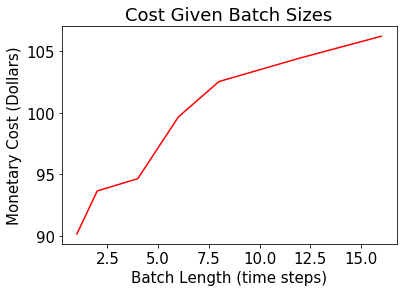

In [21]:
# Collect the correct costs
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

fig = plt.plot(batch_settings, costs, 'r-')

plt.ylabel('Monetary Cost (Dollars)')
plt.xlabel('Batch Length (time steps)')
plt.title('Cost Given Batch Sizes')


